In [17]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


In [18]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('train/labels.csv'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

0


In [24]:
IMG_SIZE=256
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('train/labels.csv')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

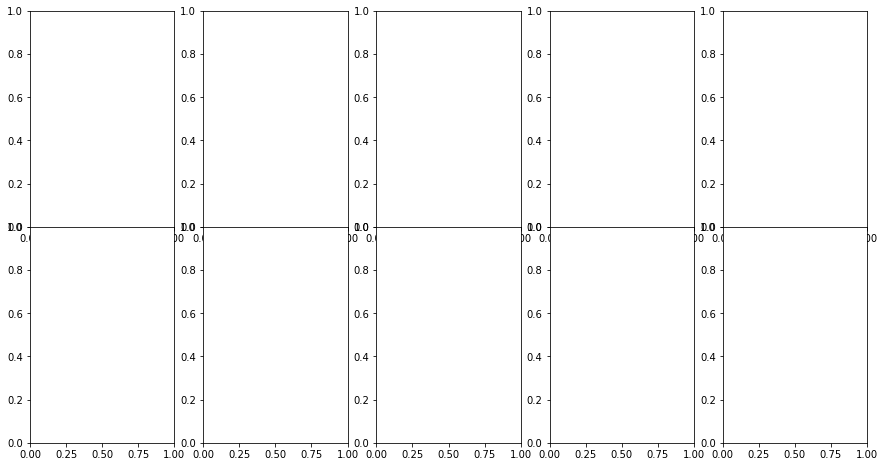

In [25]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(0):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [21]:
!unzip 'train.zip'

Archive:  train.zip
replace train/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/labels.csv        
  inflating: train/images/304.jpg    
  inflating: train/images/343.jpg    
  inflating: train/images/672.jpg    
  inflating: train/images/129.jpg    
  inflating: train/images/488.jpg    
  inflating: train/images/427.jpg    
  inflating: train/images/287.jpg    
  inflating: train/images/467.jpg    
  inflating: train/images/121.jpg    
  inflating: train/images/633.jpg    
  inflating: train/images/581.jpg    
  inflating: train/images/649.jpg    
  inflating: train/images/339.jpg    
  inflating: train/images/185.jpg    
  inflating: train/images/527.jpg    
  inflating: train/images/76.jpg     
  inflating: train/images/487.jpg    
  inflating: train/images/295.jpg    
  inflating: train/images/582.jpg    
  inflating: train/images/208.jpg    
  inflating: train/images/671.jpg    
  inflating: train/images/257.jpg    
  inflating: train/images/655.jpg    
  

In [22]:
!unzip 'test_niF99zC.zip'

Archive:  test_niF99zC.zip
replace test/images/900.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/images/900.jpg     
  inflating: test/images/1014.jpg    
  inflating: test/images/1067.jpg    
  inflating: test/images/1000.jpg    
  inflating: test/images/798.jpg     
  inflating: test/images/816.jpg     
  inflating: test/images/1054.jpg    
  inflating: test/images/1129.jpg    
  inflating: test/images/1032.jpg    
  inflating: test/images/860.jpg     
  inflating: test/images/1097.jpg    
  inflating: test/images/1114.jpg    
  inflating: test/images/1047.jpg    
  inflating: test/images/1011.jpg    
  inflating: test/images/995.jpg     
  inflating: test/images/873.jpg     
  inflating: test/images/838.jpg     
  inflating: test/images/867.jpg     
  inflating: test/images/716.jpg     
  inflating: test/images/956.jpg     
  inflating: test/images/1151.jpg    
  inflating: test/images/700.jpg     
  inflating: test/images/1216.jpg    
  inflating: test/images/1070.

In [29]:
############################################################################################

In [30]:
# image augmentation 
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import imageio

# This setup of augmentation parameters will pick two of five given 
# augmenters and apply them in random order

augmentor = iaa.SomeOf(2, [    
    iaa.Affine(scale=(0.8, 1.2)),
    iaa.Affine(rotate=(-15, 15)),
    iaa.Fliplr(1),
    iaa.Affine(shear=(-5, 5)),
    iaa.GaussianBlur(sigma=(1.0, 3.0)),
])

In [31]:
# model importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import tensorflow as tf
#import tensorflow.contrib.slim as slim
#from tensorflow.contrib.layers import flatten

from keras.layers.pooling import MaxPooling2D
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, Callback
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, ELU,GlobalAveragePooling2D
# regularizers
from keras.layers.convolutional import Convolution2D, Cropping2D, Conv2D
from keras.layers.pooling import MaxPooling2D
#from keras.optimizers import adam
from sklearn.utils import shuffle
from keras.utils import np_utils


import time, cv2, glob

global inputShape,size

In [32]:
#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('train/labels.csv'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

0


In [33]:
#Let’s take a closer look on the first technique and define a function that will 
#visualize an image and then apply the flip to that image using tf.image.
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    flipped = tf.image.flip_left_right(image)
    visualize(image, flipped)